In [1]:
import dill
import re

import pandas as pd


import ipywidgets as widgets
from IPython.display import display

In [2]:
with open('dill_files/20240215_0038_score_dataframes.dill', 'rb') as f:
    news_text_df = dill.load(f)

# 기업과 검색어 확인

In [3]:
news_text_df.to_excel( " 전체 기사.xlsx")

In [4]:
news_text_df['company_name'].value_counts()

company_name
삼성전자       5002
SK         3618
현대자동차      2743
LG         1801
카카오        1096
타다          908
VCNC        825
쿠팡          335
네이버         294
카카오페이       255
카카오모빌리티     195
네이버파이낸셜     192
토스          171
우아한형제들      152
배달의민족       132
라인           87
우버코리아         7
Name: count, dtype: int64

In [5]:
news_text_df['search_keyword'].value_counts()

search_keyword
삼성전자+이재용       5002
SK+최태원         3618
현대자동차+정의선      2743
LG+구광모         1801
카카오+김범수        1096
타다+박재욱          908
VCNC+박재욱        825
쿠팡+김범석          335
네이버+이해진         294
카카오페이+신원근       255
네이버파이낸셜+박상진     192
토스+이승건          171
우아한형제들+김봉진      152
배달의민족+김봉진       132
카카오모빌리티+정주환     108
카카오모빌리티+류긍선      87
라인+이해진           87
우버코리아+톰 화이트       7
Name: count, dtype: int64

# ESG 키워드 카운팅

In [6]:
esg_keyword_list = ['기업','ESG','사회','경영','책임',
                    '가치','투자','지배구조','환경','CSR',
                    '성과','재무','정보','평가','지속가능',
                    '등급','공시','효과','고려','시장',
                    '요소','활용','전략','지속','관리',
                    '가능성','변화','위험','회사','경영자',]

In [7]:
e_positive_keyword_list = ['친환경', '탄소중립', '생물 다양성',
                           '에너지 효율', 'RE100', '생태계',
                           '생물 다양성', '전환', '체결',
                           '수소', '저탄소', '실천','친환경 소비',
                          ]

e_negative_keyword_list = ['그린워싱', '탄소 배출', '배출', 
                           '플라스틱', '인체', '폐기물', 
                           '기후변화', '재난', '오염', 
                           '지구 온난화', '환경 파괴', '미세먼지', '종이컵',
                          ]

############################################################

s_positive_keyword_list = ['상생', '지역사회', '협력', '사회적 책임',
                           '고객', '고객 만족', '공급망 관리', 
                           '근로자 안전', '프라이버시', '데이터 보호', 
                           '노조', '사회 환원', '일자리',]

s_negative_keyword_list  = ['기술 탈취', '독점', '불공정 경쟁', 
                            '이중계약', '문어발', '해고', 
                            '불법', '척결', '처벌', '형사처벌', 
                            '반대 단체', '청탁', '부정 청탁',]

############################################################

g_positive_keyword_list =  ['주주권', '주주 보호', '사외이사', 
                            '다양성', '주주 환원', '윤리 경영', 
                            '책임 경영', '성장', '글로벌', 
                            '평가', '투자', '미래', '윤리',]


g_negative_keyword_list = ['구속', '법정구속', '압수수색', 
                           '사법 리스크', '조작', '인수 무산', 
                           '실형', '뇌물', '시세조종', '기소', 
                           '위반', '재판', '리스크',]


In [8]:
len( e_positive_keyword_list + e_negative_keyword_list + s_positive_keyword_list + s_negative_keyword_list + g_positive_keyword_list + g_negative_keyword_list )

78

In [9]:
keword_count_column_list = []
keword_isin_column_list = []
#for keyword in esg_keyword_list :
for keyword in e_positive_keyword_list + e_negative_keyword_list + s_positive_keyword_list + s_negative_keyword_list + g_positive_keyword_list + g_negative_keyword_list :
    column_name = 'keword_'+ keyword +'_count'
    news_text_df[column_name] = news_text_df['article_text'].str.count( keyword )
    keword_count_column_list.append(column_name)

    column_name = 'keword_'+ keyword +'_isin'
    news_text_df[column_name] = news_text_df['article_text'].str.count( keyword )
    keword_isin_column_list.append(column_name)

C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\233907960.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  news_text_df[column_name] = news_text_df['article_text'].str.count( keyword )
C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\233907960.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  news_text_df[column_name] = news_text_df['article_text'].str.count( keyword )
C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\233907960.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [11]:
news_text_df['esg_cnt_weight'] = news_text_df[keword_count_column_list].sum(axis = 1)
news_text_df['esg_isin_weight'] = news_text_df[keword_isin_column_list].sum(axis = 1)


news_text_df['esg_cnt_article_positive_score'] = news_text_df['article_positive_score'] * news_text_df['esg_cnt_weight'] 
news_text_df['esg_cnt_article_negative_score'] = news_text_df['article_negative_score'] * news_text_df['esg_cnt_weight'] 

news_text_df['esg_isin_article_positive_score'] = news_text_df['article_positive_score'] * news_text_df['esg_isin_weight'] 
news_text_df['esg_isin_article_negative_score'] = news_text_df['article_negative_score'] * news_text_df['esg_isin_weight'] 

news_text_df["title_class"] = news_text_df[['title_positive_score', 'title_neutral_score', 'title_negative_score']].idxmax(axis = 1).str.replace("title_", "").str.replace("article_", "").str.replace("_score", "")
news_text_df["article_class"] =  news_text_df[['article_positive_score', 'article_neutral_score', 'article_negative_score']].idxmax(axis = 1).str.replace("title_", "").str.replace("article_", "").str.replace("_score", "")

In [12]:
news_text_df.columns

Index(['seq', 'article_reg_date', 'article_link', 'company_name',
       'company_symbol', 'news_agency', 'search_keyword', 'sentence_index',
       'title', 'article_text',
       ...
       'keword_리스크_count', 'keword_리스크_isin', 'esg_cnt_weight',
       'esg_isin_weight', 'esg_cnt_article_positive_score',
       'esg_cnt_article_negative_score', 'esg_isin_article_positive_score',
       'esg_isin_article_negative_score', 'title_class', 'article_class'],
      dtype='object', length=179)

In [13]:
news_text_df['company_name'].value_counts()

company_name
삼성전자       5002
SK         3618
현대자동차      2743
LG         1801
카카오        1096
타다          908
VCNC        825
쿠팡          335
네이버         294
카카오페이       255
카카오모빌리티     195
네이버파이낸셜     192
토스          171
우아한형제들      152
배달의민족       132
라인           87
우버코리아         7
Name: count, dtype: int64

# 비교 대상 기업 지정 ( 양방향 구조로 개선 추후 필요 )

In [14]:
compare_targets_dict = {
    '삼성전자' : ['현대자동차', 'LG', 'SK'],
    '카카오' : ['네이버', '라인', '쿠팡', '우아한형제들', '배달의민족'],
    'VCNC' : ['카카오모빌리티', '우버코리아'],
    '토스' : ['카카오페이', '네이버파이낸셜'],
}

company_main_event = { 
    
    '삼성전자' : [
        '2020-06-04', # 6월 4일 = 검찰, 이재용 회장 등 3명 주식시세 조종·분식회계 혐의 구속영장 청구
        '2020-06-09', # 6월 9일 = 이재용 회장 등 3명 구속영장 기각
        '2020-09-01', # 9월 1일 = 서울중앙지검, '삼성 부당 합병·승계 의혹' 이 회장 등 11명 불구속 기소
        '2021-01-18', # 1월 18일 = 이재용 부회장 구속
    ],
    
    '카카오' : [],
    
    'VCNC' : [
        '2019-07-17', # 2019년 7월 17일 / 국토부, '혁신성장과 상생발전을 위한 택시 제도 개편 방안' 발표 (타다 금지)
        '2019-10-28', # 2019년 10월 28일 / 검찰, 타다(박재욱, 이재웅(쏘카 당시 대표)) 기소
        '2020-02-19', # 2020년 2월 19일 / 중앙지법, 타다 무죄 판결
        '2020-05-01', # 2020년 5월 1일 / 타다, 타다금지법에 대한 헌법소원 제기
        '2020-06-24', # 2020년 5월 1일 / 타다, 타다금지법에 대한 헌법소원 제기
       ],
    
    '토스' : ['2022-10-01', '2023-04-01'], 
    #*일단 기사를 찾아보니 최근 부정적인 이슈가
    #(1) 토스 이용자 개인 정보 판매 의혹 건(2022년 10월 국감)
    #(2) 토스뱅크 유동성 위기(2023년 4월 전후)
    # 정확하지 않은 일자.
}
    

In [15]:
len( keword_count_column_list )

78

# 분석 진행

In [17]:
dropdown_box = widgets.Dropdown(
    options= compare_targets_dict.keys() ,
    description='기업명:',
    disabled=False,
)
display(dropdown_box)

Dropdown(description='기업명:', options=('삼성전자', '카카오', 'VCNC', '토스'), value='삼성전자')

In [52]:
# 기업들
#target_company_name = '토스'
target_company_name = dropdown_box.value
compare_targets_list = compare_targets_dict[target_company_name]
query_list = [target_company_name] + compare_targets_list

# 일별 점수 산출
daily_grouped_scroes_df = news_text_df.query( " company_name == @target_company_name or company_name in @compare_targets_list")[
    [
        'article_reg_date', 'company_name',
        
        'title_positive_score', 'title_negative_score', 
        'article_positive_score', 'article_negative_score',

        #'keword_기업_count', 'keword_ESG_count', 'keword_사회_count', 'keword_경영_count',
        #'keword_책임_count', 'keword_가치_count', 'keword_투자_count', 'keword_지배구조_count',
        #'keword_환경_count', 'keword_CSR_count', 'keword_성과_count', 'keword_재무_count',
        #'keword_정보_count', 'keword_평가_count', 'keword_지속가능_count', 'keword_등급_count',
        #'keword_공시_count', 'keword_효과_count', 'keword_고려_count', 'keword_시장_count',
        #'keword_요소_count', 'keword_활용_count', 'keword_전략_count', 'keword_지속_count',
        #'keword_관리_count', 'keword_가능성_count', 'keword_변화_count', 'keword_위험_count',
        #'keword_회사_count', 'keword_경영자_count',


        'keword_친환경_count', 'keword_탄소중립_count', 'keword_생물 다양성_count', 
        'keword_에너지 효율_count', 'keword_RE100_count', 'keword_생태계_count', 
        'keword_생물 다양성_count', 'keword_전환_count', 'keword_체결_count',
        'keword_수소_count', 'keword_저탄소_count', 'keword_실천_count',
        'keword_친환경 소비_count', 

        #
        
        'keword_그린워싱_count', 'keword_탄소 배출_count', 'keword_배출_count',
        'keword_플라스틱_count', 'keword_인체_count', 'keword_폐기물_count', 
        'keword_기후변화_count', 'keword_재난_count', 'keword_오염_count',
        'keword_지구 온난화_count', 'keword_환경 파괴_count', 'keword_미세먼지_count', 
        'keword_종이컵_count', 

        ##
        
        'keword_상생_count', 'keword_지역사회_count', 'keword_협력_count', 
        'keword_사회적 책임_count', 'keword_고객_count', 'keword_고객 만족_count', 
        'keword_공급망 관리_count', 'keword_근로자 안전_count', 'keword_프라이버시_count', 
        'keword_데이터 보호_count', 'keword_노조_count', 'keword_사회 환원_count', 
        'keword_일자리_count', 

        #
        
        'keword_기술 탈취_count', 'keword_독점_count', 'keword_불공정 경쟁_count', 
        'keword_이중계약_count', 'keword_문어발_count', 'keword_해고_count',
        'keword_불법_count', 'keword_척결_count', 'keword_처벌_count',
        'keword_형사처벌_count', 'keword_반대 단체_count', 'keword_청탁_count',
        'keword_부정 청탁_count', 
        
        ##
        
        'keword_주주권_count', 'keword_주주 보호_count', 'keword_사외이사_count', 
        'keword_다양성_count', 'keword_주주 환원_count', 'keword_윤리 경영_count', 
        'keword_책임 경영_count', 'keword_성장_count', 'keword_글로벌_count', 
        'keword_평가_count', 'keword_투자_count', 'keword_미래_count',
        'keword_윤리_count',

        #
        
        'keword_구속_count', 'keword_법정구속_count', 'keword_압수수색_count', 
        'keword_사법 리스크_count', 'keword_조작_count','keword_인수 무산_count', 
        'keword_실형_count', 'keword_뇌물_count', 'keword_시세조종_count', 
        'keword_기소_count', 'keword_위반_count', 'keword_재판_count',
        'keword_리스크_count',
        
        'esg_cnt_weight',

        #'title_class', 
        #'article_class',
    ]
].groupby( ['article_reg_date', 'company_name']).agg( { 
        'sum', 'count'
    }).reset_index().set_index([ 'article_reg_date',  'company_name'] )

# 데이터 프레임 생성
daily_grouped_scroes_df = pd.pivot(daily_grouped_scroes_df.reset_index() , index='article_reg_date', columns='company_name').asfreq('D').fillna(0)


# 일별 스코어 최종 집계
title_scores_df = (daily_grouped_scroes_df['title_positive_score']['sum'] * daily_grouped_scroes_df['title_positive_score']['count'] -  daily_grouped_scroes_df['title_negative_score']['sum']* daily_grouped_scroes_df['title_positive_score']['count'] ).rolling(5).mean()
article_scores_df = (daily_grouped_scroes_df['article_positive_score']['sum']  * daily_grouped_scroes_df['article_positive_score']['count'] -  daily_grouped_scroes_df['article_negative_score']['sum']   * daily_grouped_scroes_df['article_negative_score']['count']).rolling(5).mean()

C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\946154922.py:78: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\946154922.py:78: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\946154922.py:78: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\946154922.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\woneu\AppData\Local\Temp\ipykernel_16476\946154922.py:81: PerformanceWarning:

indexing past lexsort depth may impact performance.



## 기사 감성 score ( 비교 대상군 존재 )

C:\Users\woneu\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



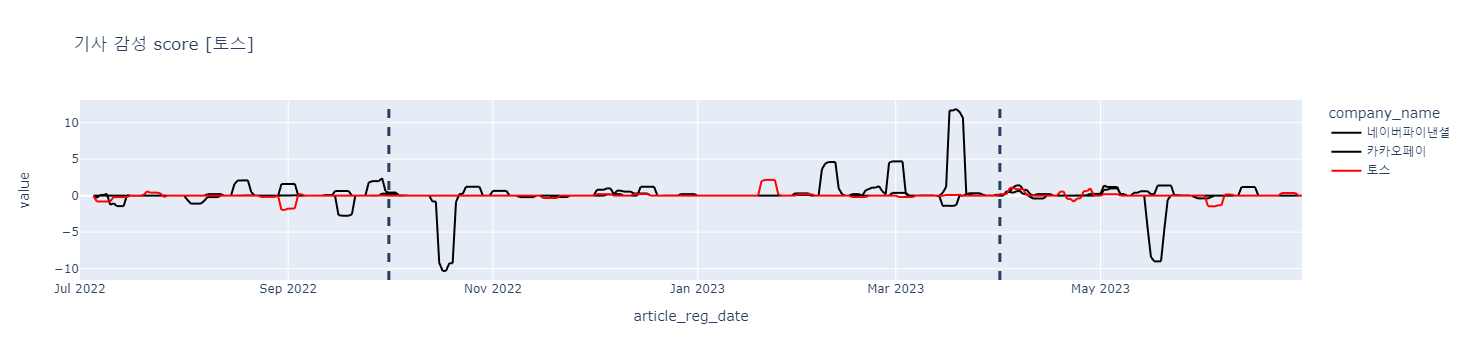

In [53]:
import plotly.express as px

color_map_dict = {}
color_map_dict[target_company_name] = "red"
for comp_name in compare_targets_list :
    color_map_dict[comp_name] = "black"    

fig = px.line( 
    pd.melt(
        article_scores_df.reset_index(), 
        id_vars = ['article_reg_date'],
    ),
    x="article_reg_date", 
    y="value", 
    color = "company_name",
    title='기사 감성 score [' + target_company_name + ']',
    color_discrete_map = color_map_dict
             )
# 나중에 이슈 관련이 전부 생성된다면, 반복문 돌려서 해당 일자 수직선 생성할것.
for date in company_main_event[target_company_name]:
    fig.add_vline(x=date, line_width=3, line_dash="dash")
fig.show()

## 키워드 등장 빈도

In [54]:
keyword_count_df = daily_grouped_scroes_df.xs(
    key= target_company_name ,
    level=2, 
    axis=1).xs(
        key= 'sum',
        level=1,
        axis=1)[ keword_count_column_list + ['esg_cnt_weight'] ]


keyword_count_df.columns = [re.sub(r'keword_|_count', '', s) for s in keyword_count_df.columns.tolist() ]

C:\Users\woneu\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



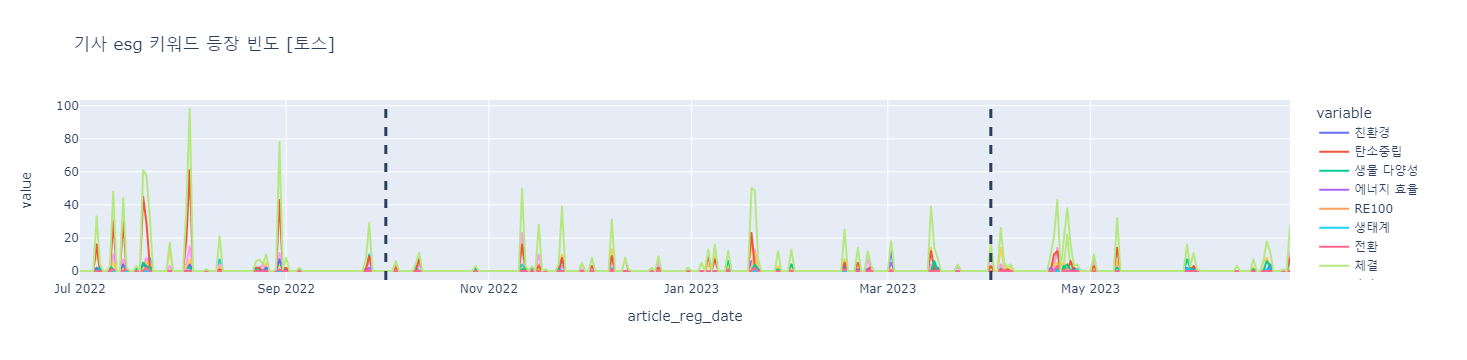

In [55]:
import plotly.express as px

fig = px.line(
    pd.melt(keyword_count_df.reset_index(), 
            id_vars= ['article_reg_date']
           ),
    x="article_reg_date", 
    y="value", 
    color = "variable", 
    title='기사 esg 키워드 등장 빈도 [' + target_company_name + ']',
)
for date in company_main_event[target_company_name]:
    fig.add_vline(x=date, line_width=3, line_dash="dash")
fig.show()